In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
from random import *

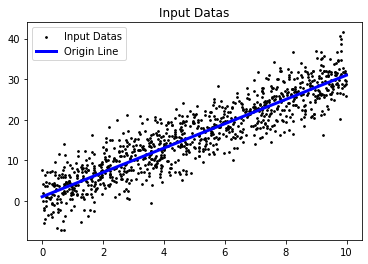

In [232]:

m = 1000 # num of dataset
theta0 = 1 
theta1 = 3

def get_y(t0,t1,x) :
    return t0 + t1*x


standard_deviation = 4
noise_generator = torch.distributions.Normal(torch.tensor([0.0]),standard_deviation)


input_dataset = []


#print(noise.shape)

#print (noise)

# Generate X, Y values
train_x = []
train_y = []
train_set = []

for i in range(0,m) :
    x = random() * 10
    noise = noise_generator.sample((1,))
    
    y = get_y(theta0,theta1,x) + noise.item()
    
    train_x.append([x])
    train_y.append([y])
    train_set.append([i,y])



# for Line drawing
train_x_min = min(train_x)[0]
train_x_max = max(train_x)[0]



plot1 = plt.scatter(train_x,train_y, color='black',marker='o',s=3)
plot2, = plt.plot([train_x_min,train_x_max],[get_y(theta0,theta1,train_x_min),get_y(theta0,theta1,train_x_max)], color='blue',linewidth=3)
plot2.LineWidth=10

plt.title("Input Datas") 
plt.legend([plot1,plot2],["Input Datas","Origin Line"])
plt.show()

In [238]:
def get_loss(yh,y) :
    size = y.size()

    

# Initialize thetas
train_x = torch.FloatTensor(train_x)
train_y = torch.FloatTensor(train_y)
trainset = torch.FloatTensor(trainset)

hth0 = torch.FloatTensor([1.0])
hth1 = torch.FloatTensor([1.0])
lr = 0.01


loss_conv = 1e-6 # loss converge standard
loss_log = []
hth0_log = []
hth1_log = []
epoch_log = []
conv_count = 0
epoch = 0
while (True) :
    epoch +=1
    epoch_log.append(epoch)
    
    # Get yh Value
    yh = hth0 + hth1*train_x
    
    # Get Loss (Energy)
    loss = (1/ (2*m)) * torch.sum((yh - train_y)**2)
    
    # Record Status Log
    loss_log.append(loss)
    hth0_log.append(hth0)
    hth1_log.append(hth1)
    
    # Updating Parameters
    hth0 = hth0 - lr * (1/m) * torch.sum((yh-train_y))
    hth1 = hth1 - lr * (1/m) * torch.sum((yh-train_y)*train_x)
    
    if len(loss_log) > 2 :
        if abs(loss_log[-1] - loss_log[-2]) < loss_conv :
            conv_count += 1
        else :
            conv_count = 0
            
    if conv_count > 3 :
        print("Loss is converged")
        print(hth0,hth1,loss_log[-1])
        break



Loss is converged
tensor([1.2281]) tensor([2.9814]) tensor(7.9895)


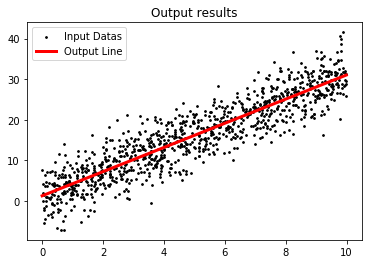

In [239]:
# Output results
plot1 = plt.scatter(train_x,train_y, color='black',marker='o',s=3)
plot2, = plt.plot([train_x_min,train_x_max],[get_y(hth0,hth1,train_x_min),get_y(hth0,hth1,train_x_max)], color='red',linewidth=3)
plot2.LineWidth=10

plt.title("Output results") 
plt.legend([plot1,plot2],["Input Datas","Output Line"])
plt.show()

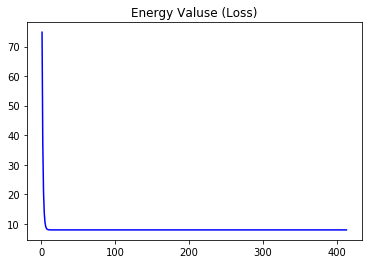

In [245]:
plot1 = plt.plot(epoch_log,loss_log, color='blue',label='Energy Values')
plt.title("Energy Valuse (Loss)")
plt.show()